# Traffic Sign Classfication 



In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import random

In [4]:
#!unzip archive\ \(1\).zip
input_path = ''
training_path = 'traffic_Data/DATA'
testing_path = 'traffic_Data/TEST'
classes = pd.read_csv(os.path.join(input_path,'labels.csv'))
classes_size = len(classes)
print("Total number of classes: ", classes_size)

Total number of classes:  58


In [ ]:
traffic_data = []
training_data = []
labels = []

for class_val in os.listdir(os.path.join(input_path, training_path)):
    class_path = os.path.join(input_path, training_path, class_val)
    labels.append(class_val)
    for traffic_sign in os.listdir(class_path):
        image = Image.open(os.path.join(class_path,traffic_sign))
        image = image.convert("RGB")
        image = image.resize((227, 227))
        image = np.array(image)
        traffic_data.append((image,[int(class_val)]))
labels = np.array(labels)


In [4]:
seed = 42
np.random.seed(seed)

In [ ]:
traffic_data_features, traffic_data_labels = zip(*traffic_data)
training_data_features, validation_data_features, training_data_labels, validation_data_labels = train_test_split(traffic_data_features, traffic_data_labels, test_size=0.30, random_state=seed)
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)
print(training_data_features.shape)
print(training_data_labels.shape)

(2919, 227, 227, 3)
(2919, 1)


## A Few Image Examples

In [ ]:
np.random.seed(seed)
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image_index = random.randrange(0, training_data_labels.shape[0])
    plt.imshow(training_data_features[image_index])
    plt.title(classes.iloc[training_data_labels[image_index][0], 1])
    plt.axis('off')


plt.show()

-----------------------------------------------------------
-----------------------------------------------------------
-----------------------------------------------------------

## Check GPU Availability

In [46]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())
tf.config.list_physical_devices('GPU')

['/device:CPU:0']


[]

## AlexNet

### Please Note AlexNet & Customized Model need to be constructed manually

In [5]:
clbck = [EarlyStopping(monitor='val_loss', patience=3)]

In [35]:
model_alex_sgd = Sequential([
    #1st Convolutional Layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    #5th Convolutional Layer
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    #Passing it to a Fully Connected layer
    Flatten(),
    # 1st Fully Connected Layer
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    # 3rd Fully Connected Layer
    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    #Output Layer
    Dense(58, activation='softmax'),
    BatchNormalization()
])

In [ ]:
model_alex_sgd.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

#model_alex_sgd.summary()

In [ ]:
epochs = 40
batch_size = 16

In [ ]:
history_alex_sgd = model_alex_sgd.fit(training_data_features,
                    training_data_labels,
                    callbacks = clbck,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(validation_data_features, validation_data_labels))

Epoch 1/40
183/183 [==============================] - 12s 17ms/step - loss: 4.3366 - accuracy: 0.0476 - val_loss: 3.9500 - val_accuracy: 0.1703
Epoch 2/40
183/183 [==============================] - 2s 11ms/step - loss: 3.9030 - accuracy: 0.1473 - val_loss: 3.2004 - val_accuracy: 0.3485
Epoch 3/40
183/183 [==============================] - 2s 11ms/step - loss: 3.6304 - accuracy: 0.2059 - val_loss: 3.0901 - val_accuracy: 0.3717
Epoch 4/40
183/183 [==============================] - 2s 11ms/step - loss: 3.4466 - accuracy: 0.2436 - val_loss: 2.9521 - val_accuracy: 0.4373
Epoch 5/40
183/183 [==============================] - 2s 11ms/step - loss: 3.2537 - accuracy: 0.2909 - val_loss: 2.6933 - val_accuracy: 0.4548
Epoch 6/40
183/183 [==============================] - 2s 11ms/step - loss: 3.1211 - accuracy: 0.3350 - val_loss: 2.4154 - val_accuracy: 0.5100
Epoch 7/40
183/183 [==============================] - 2s 11ms/step - loss: 2.9062 - accuracy: 0.3768 - val_loss: 2.2925 - val_accuracy: 0.535

In [ ]:
model_alex_adam = Sequential([
    #1st Convolutional Layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    #5th Convolutional Layer
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    #Passing it to a Fully Connected layer
    Flatten(),
    # 1st Fully Connected Layer
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    # 3rd Fully Connected Layer
    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    #Output Layer
    Dense(58, activation='softmax'),
    BatchNormalization()
])
model_alex_adam.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


In [ ]:
history_alex_adam = model_alex_adam.fit(training_data_features,
                    training_data_labels,
                    batch_size=batch_size,
                    callbacks = clbck,
                    epochs=epochs,
                    validation_data=(validation_data_features, validation_data_labels))

## Customized Model

In [ ]:
def convolutionModel():
    cnnModel = Sequential()
    cnnModel.add(Conv2D(16,(3,3), padding="same", input_shape=(227, 227, 3), activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Conv2D(32,(3,3), padding="same", activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Conv2D(64,(5,5), padding="same", activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Conv2D(128,(7,7), padding="same", activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Flatten())
    cnnModel.add(Dense(232, activation='relu'))
    cnnModel.add(Dense(116, activation='relu'))
    cnnModel.add(Dense(58, activation='softmax'))
    return cnnModel

cnnModel = convolutionModel()
#cnnModel.summary()

In [8]:
epochs = 40
batchSize = 16

In [ ]:
cnnModel.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
trafficSignNetwork = cnnModel.fit(training_data_features,
                                  training_data_labels,
                                  callbacks = clbck,
                                  batch_size=batchSize,
                                  epochs=epochs,
                                  validation_data=(validation_data_features, validation_data_labels))

In [ ]:
cnnModel_adam = convolutionModel()
cnnModel_adam.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
trafficSignNetwork_adam = cnnModel_adam.fit(training_data_features,
                                  training_data_labels,
                                  callbacks = clbck,
                                  batch_size=batchSize,
                                  epochs=epochs,
                                  validation_data=(validation_data_features, validation_data_labels))

In [ ]:
cnnModel_less_epochs = convolutionModel()
cnnModel_less_epochs.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
trafficSignNetwork_less_epochs = cnnModel_less_epochs.fit(training_data_features,
                                  training_data_labels,
                                  batch_size=batchSize,
                                                          callbacks = clbck,
                                  epochs=5,
                                  validation_data=(validation_data_features, validation_data_labels))

In [ ]:
cnnModel_more_epochs = convolutionModel()
cnnModel_more_epochs.compile(optimizer=tf.optimizers.SGD(learning_rate=0.0002),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
trafficSignNetwork_more_epochs = cnnModel_more_epochs.fit(training_data_features,
                                                          training_data_labels,
                                                          callbacks = clbck,
                                  batch_size=batchSize,
                                  epochs=30,
                                  validation_data=(validation_data_features, validation_data_labels))

In [17]:
testing_data = []
for test_image_file in os.listdir(os.path.join(input_path, testing_path)):
    test_image = Image.open(os.path.join(input_path, testing_path, test_image_file))
    test_image = test_image.convert("RGB")
    test_image = test_image.resize((227, 227))
    test_image = np.array(test_image)
    testing_data.append((test_image, [int(test_image_file[1:3])]))
testing_data_features, testing_data_labels = zip(*testing_data)
testing_data_features = np.array(testing_data_features)
testing_data_labels = np.array(testing_data_labels)

In [5]:
testing_data_224 = []
for test_image_file in os.listdir(os.path.join(input_path, testing_path)):
    test_image = Image.open(os.path.join(input_path, testing_path, test_image_file))
    test_image = test_image.convert("RGB")
    test_image = test_image.resize((224, 224))
    test_image = np.array(test_image)
    testing_data_224.append((test_image, [int(test_image_file[1:3])]))
testing_data_224_features, testing_data_224_labels = zip(*testing_data_224)
testing_data_224_features = np.array(testing_data_224_features)
testing_data_224_labels = np.array(testing_data_224_labels)

In [19]:
testing_data_299 = []
for test_image_file in os.listdir(os.path.join(input_path, testing_path)):
    test_image = Image.open(os.path.join(input_path, testing_path, test_image_file))
    test_image = test_image.convert("RGB")
    test_image = test_image.resize((299, 299))
    test_image = np.array(test_image)
    testing_data_299.append((test_image, [int(test_image_file[1:3])]))
testing_data_299_features, testing_data_299_labels = zip(*testing_data_299)
testing_data_299_features = np.array(testing_data_299_features)
testing_data_299_labels = np.array(testing_data_299_labels)

In [20]:
def pred_acc(model, features, labels):
  test_loss, test_acc = model.evaluate(features, labels, verbose=2)
  print(test_acc)
  return test_acc

## VGG16 With and Without Data Augmentation

In [ ]:
traffic_data = []
training_data = []
labels = []

for class_val in os.listdir(os.path.join(input_path, training_path)):
    class_path = os.path.join(input_path, training_path, class_val)
    labels.append(class_val)
    for traffic_sign in os.listdir(class_path):
        image = Image.open(os.path.join(class_path,traffic_sign))
        image = image.convert("RGB")
        image = image.resize((224, 224))
        image = np.array(image)
        traffic_data.append((image,[int(class_val)]))
labels = np.array(labels)

traffic_data_features, traffic_data_labels = zip(*traffic_data)
training_data_features, validation_data_features, training_data_labels, validation_data_labels = train_test_split(traffic_data_features, traffic_data_labels, test_size=0.30, random_state=seed)
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)


In [7]:
train_vgg_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                                                  rescale=1/255,
                                                                  shear_range=0.2,
                                                                  zoom_range=0.5,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  validation_split=0.3)
train_vgg_images = train_vgg_generator.flow_from_directory(
    directory=os.path.join(input_path, training_path),
    subset='training',
    color_mode='rgb',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=16,
    seed=42
)
validation_vgg_images = train_vgg_generator.flow_from_directory(
    directory=os.path.join(input_path, training_path),
    subset='validation',
    color_mode='rgb',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=16,
    seed=42
)


Found 2942 images belonging to 58 classes.
Found 1228 images belonging to 58 classes.


In [ ]:
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet')

vgg_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
vgg_history = vgg_model.fit(training_data_features,
                                  training_data_labels,
                                  batch_size=batchSize,
                                                          callbacks = clbck,
                                  epochs=epochs,
                                  validation_data=(validation_data_features, validation_data_labels))



Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


183/183 [==============================] - 9s 40ms/step - loss: 1.5756 - accuracy: 0.6732 - val_loss: 0.2543 - val_accuracy: 0.9345
Epoch 2/40
183/183 [==============================] - 7s 38ms/step - loss: 0.1326 - accuracy: 0.9671 - val_loss: 0.0738 - val_accuracy: 0.9808
Epoch 3/40
183/183 [==============================] - 7s 38ms/step - loss: 0.0182 - accuracy: 0.9959 - val_loss: 0.0366 - val_accuracy: 0.9904
Epoch 4/40
183/183 [==============================] - 7s 38ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9936
Epoch 5/40
183/183 [==============================] - 7s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9952
Epoch 6/40
183/183 [==============================] - 7s 38ms/step - loss: 7.1691e-04 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9936
Epoch 7/40
183/183 [==============================] - 7s 38ms/step - loss: 5.2386e-04 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9936
Ep

In [ ]:
vgg16_obj = VGG16(include_top = False, input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
for layer in vgg16_obj.layers:             # Off the training of the trainable parameters
    layer.trainable = False
from keras.models import Model
f1 = Flatten()(vgg16_obj.output)
final_layer = Dense(58, activation='softmax')(f1)
vgg_dataaug_model = Model(inputs=vgg16_obj.input,outputs=final_layer)

vgg_dataaug_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
vgg_dataaug_history = vgg_dataaug_model.fit_generator(train_vgg_images,
                                                          callbacks = clbck,
                                  epochs=epochs,
                                  validation_data=validation_vgg_images)

### ResNet50V2

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2

res_model = ResNet50V2(weights='imagenet')

res_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
res_history = res_model.fit(training_data_features,
                                  training_data_labels,
                                  batch_size=batchSize,
                                                          callbacks = clbck,
                                  epochs=epochs,
                                  validation_data=(validation_data_features, validation_data_labels))

Epoch 1/40
183/183 [==============================] - 21s 45ms/step - loss: 3.5936 - accuracy: 0.4495 - val_loss: 0.9699 - val_accuracy: 0.7938
Epoch 2/40
183/183 [==============================] - 7s 38ms/step - loss: 0.7497 - accuracy: 0.8767 - val_loss: 0.2759 - val_accuracy: 0.9488
Epoch 3/40
183/183 [==============================] - 7s 38ms/step - loss: 0.3084 - accuracy: 0.9589 - val_loss: 0.1521 - val_accuracy: 0.9616
Epoch 4/40
183/183 [==============================] - 7s 38ms/step - loss: 0.1842 - accuracy: 0.9767 - val_loss: 0.1221 - val_accuracy: 0.9712
Epoch 5/40
183/183 [==============================] - 7s 38ms/step - loss: 0.1255 - accuracy: 0.9836 - val_loss: 0.0916 - val_accuracy: 0.9792
Epoch 6/40
183/183 [==============================] - 7s 39ms/step - loss: 0.0818 - accuracy: 0.9921 - val_loss: 0.0779 - val_accuracy: 0.9848
Epoch 7/40
183/183 [==============================] - 7s 38ms/step - loss: 0.0684 - accuracy: 0.9945 - val_loss: 0.0675 - val_accuracy: 0.982

### Inception V3

In [ ]:
traffic_data = []
training_data = []
labels = []

for class_val in os.listdir(os.path.join(input_path, training_path)):
    class_path = os.path.join(input_path, training_path, class_val)
    labels.append(class_val)
    for traffic_sign in os.listdir(class_path):
        image = Image.open(os.path.join(class_path,traffic_sign))
        image = image.convert("RGB")
        image = image.resize((299, 299))
        image = np.array(image)
        traffic_data.append((image,[int(class_val)]))
labels = np.array(labels)

traffic_data_features, traffic_data_labels = zip(*traffic_data)
training_data_features, validation_data_features, training_data_labels, validation_data_labels = train_test_split(traffic_data_features, traffic_data_labels, test_size=0.30, random_state=seed)
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)

In [ ]:
from keras.applications.inception_v3 import InceptionV3

incep_model = InceptionV3(weights='imagenet')

incep_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
incep_history = incep_model.fit(training_data_features,
                                  training_data_labels,
                                  batch_size=batchSize,
                                                          callbacks = clbck,
                                  epochs=epochs,
                                  validation_data=(validation_data_features, validation_data_labels))

Epoch 1/40
183/183 [==============================] - 27s 68ms/step - loss: 4.7164 - accuracy: 0.2785 - val_loss: 1.9731 - val_accuracy: 0.6275
Epoch 2/40
183/183 [==============================] - 11s 59ms/step - loss: 1.3695 - accuracy: 0.7756 - val_loss: 0.6999 - val_accuracy: 0.8633
Epoch 3/40
183/183 [==============================] - 11s 59ms/step - loss: 0.6538 - accuracy: 0.8972 - val_loss: 0.3766 - val_accuracy: 0.9161
Epoch 4/40
183/183 [==============================] - 11s 59ms/step - loss: 0.3931 - accuracy: 0.9329 - val_loss: 0.2311 - val_accuracy: 0.9528
Epoch 5/40
183/183 [==============================] - 11s 58ms/step - loss: 0.2798 - accuracy: 0.9596 - val_loss: 0.1579 - val_accuracy: 0.9720
Epoch 6/40
183/183 [==============================] - 11s 60ms/step - loss: 0.2199 - accuracy: 0.9733 - val_loss: 0.1173 - val_accuracy: 0.9784
Epoch 7/40
183/183 [==============================] - 11s 59ms/step - loss: 0.1608 - accuracy: 0.9829 - val_loss: 0.0930 - val_accuracy:

## Accuracy on Test Data

In [ ]:
pred_acc(cnnModel, testing_data_features, testing_data_labels)
pred_acc(cnnModel_adam, testing_data_features, testing_data_labels)
pred_acc(cnnModel_more_epochs, testing_data_features, testing_data_labels)
pred_acc(cnnModel_less_epochs, testing_data_features, testing_data_labels)
pred_acc(model_alex_sgd, testing_data_features, testing_data_labels)
pred_acc(model_alex_adam, testing_data_features, testing_data_labels)
pred_acc(vgg_model, testing_data_224_features, testing_data_224_labels)
pred_acc(res_model, testing_data_224_features, testing_data_224_labels)
pred_acc(incep_model, testing_data_299_features, testing_data_299_labels)

63/63 - 0s - loss: 2.9840 - accuracy: 0.4845 - 314ms/epoch - 5ms/step
0.48445335030555725
63/63 - 1s - loss: 0.9542 - accuracy: 0.7934 - 1s/epoch - 20ms/step
0.7933801412582397
63/63 - 1s - loss: 0.6906 - accuracy: 0.8435 - 1s/epoch - 18ms/step
0.8435305953025818
63/63 - 1s - loss: 0.4825 - accuracy: 0.8877 - 1s/epoch - 23ms/step
0.8876630067825317


0.8876630067825317

In [6]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
)
test_vgg_images = test_generator.flow_from_directory(
    directory=os.path.join(input_path, testing_path),
    color_mode='rgb',
    class_mode='categorical',
    target_size=(224, 224),
    seed=42
)


Found 0 images belonging to 0 classes.


In [33]:
score, accuracy = vgg_dataaug_model.evaluate(test_vgg_images)
print(f'Test score: {round(score,4)}, Test accuracy: {round(accuracy,4)}')

63/63 [==============================] - 99s 2s/step - loss: 84.6798 - accuracy: 0.4714
Test score: 84.6798, Test accuracy: 0.4714


### Some Figures to be Used in the Report

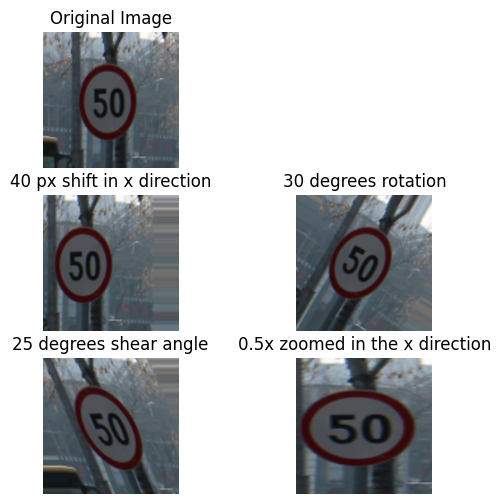

In [20]:

plt.figure(figsize=(6, 6))
plt.subplot(3, 2, 1)
plt.imshow(testing_data_224[200][0])
plt.title("Original Image")
plt.axis("off")
plt.subplot(3, 2, 3)
plt.imshow(test_generator.apply_transform(testing_data_224[200][0], {'tx':40}))
plt.title("40 px shift in x direction")
plt.axis("off")
plt.subplot(3, 2, 4)
plt.imshow(test_generator.apply_transform(testing_data_224[200][0], {'theta':-30}))
plt.title("30 degrees rotation")
plt.axis("off")
plt.subplot(3, 2, 5)
plt.imshow(test_generator.apply_transform(testing_data_224[200][0], {'shear':25}))
plt.title("25 degrees shear angle")
plt.axis("off")
plt.subplot(3, 2, 6)
plt.imshow(test_generator.apply_transform(testing_data_224[200][0], {'zx':0.5}))
plt.title("0.5x zoomed in the x direction")
plt.axis("off")

plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(trafficSignNetwork.history['accuracy'], label='train_acc')
plt.plot(trafficSignNetwork.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- SGD')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(trafficSignNetwork_adam.history['accuracy'], label='train_acc')
plt.plot(trafficSignNetwork_adam.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- Adam')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(trafficSignNetwork_more_epochs.history['accuracy'], label='train_acc')
plt.plot(trafficSignNetwork_more_epochs.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- 21 epochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(trafficSignNetwork_less_epochs.history['accuracy'], label='train_acc')
plt.plot(trafficSignNetwork_less_epochs.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- 5 epochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(incep_history.history['accuracy'], label='train_acc')
plt.plot(incep_history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- Inception-V3')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(vgg_history.history['accuracy'], label='train_acc')
plt.plot(vgg_history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- VGG16')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(res_history.history['accuracy'], label='train_acc')
plt.plot(res_history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy plot -- ResNet50V2')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.legend()
plt.show()